Carica il dataset Wine
Utilizza il modulo datasets di scikit-learn per caricare il dataset Wine.

Esplora il dataset
Visualizza il numero di campioni per ciascuna classe e calcola le statistiche di base delle feature.
Visualizzazione: crea un grafico a barre per mostrare la distribuzione delle classi.

Riduci la dimensionalità  ***
Applica la PCA (Principal Component Analysis) per ridurre le dimensioni delle feature a 2 componenti
principali.
Visualizzazione: crea un grafico scatter 2D per rappresentare i dati trasformati, con i punti colorati in
base alla classe.

Sudddividi i dati in training e test set
Dividi i dati in due set: l'80% per il training e il 20% per il test.

Applica un algoritmo di classificazione
Utilizza un modello RandomForestClassifier per la classificazione.

Valuta la performance del modello
Valuta le prestazioni utilizzando le metriche di accuratezza, precisione, recall e F1-score.

Visualizza l'importanza delle feature / caratteristiche
Visualizza le feature più importanti del dataset Wine secondo il modello Random Forest, utilizzando un
grafico a barre.

Visualizza la matrice di confusione
Genera e visualizza la matrice di confusione per valutare la qualità della classificazione.
Visualizzazione: utilizza una heatmap per rappresentare la matrice di confusione in modo più chiaro.

Ottimizza l'algoritmo  
Utilizza la GridSearchCV per ottimizzare i parametri del Random Forest (ad esempio: numero di estimatori e
profondità massima dell'albero).



In [1]:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Moduli di scikit-learn
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)



# Configura le visualizzazioni
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
## from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data  # caratteristiche
y = wine.target  # target
feature_names = wine.feature_names
target_names = wine.target_names


## rubato da https://www.geeksforgeeks.org/wine-dataset/
# Load the wine dataset into a DataFrame
wine_data = load_wine(as_frame=True)
wine_df = pd.DataFrame(X, columns = feature_names)
wine_df['target'] = y


In [3]:
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
# Display the shape of the DataFrame
print("Shape of the Wine DataFrame:", wine_df.shape)

Shape of the Wine DataFrame: (178, 14)


In [6]:
# Visualizza il numero di campioni per ciascuna classe
class_counts = wine_df['target'].value_counts()
print("Numero di campioni per ciascuna classe:")
print(class_counts)

Numero di campioni per ciascuna classe:
target
1    71
0    59
2    48
Name: count, dtype: int64


In [7]:
# Calcola le statistiche di base delle feature
feature_stats = wine_df.describe()
print("\nStatistiche di base delle feature:")
print(feature_stats)


Statistiche di base delle feature:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453

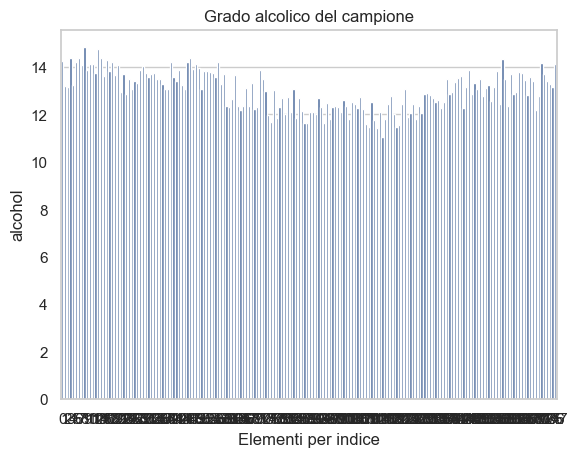

In [8]:
sns.barplot(x = wine_df.index, y = "alcohol", data = wine_df)
plt.title("Grado alcolico del campione")
plt.xlabel("Elementi per indice")
plt.show()

C:\Users\Rasty\AppData\Local\Temp\ipykernel_48380\123435405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "target", data = wine_df, palette = "Set2")


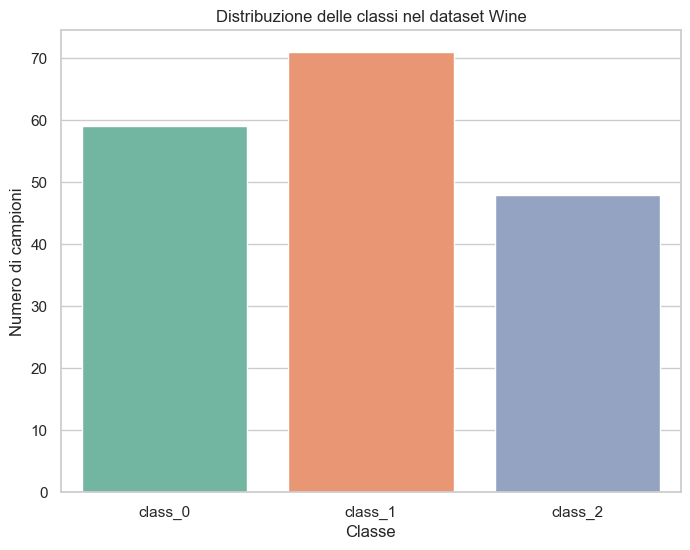

In [9]:
# Grafico a barre per mostrare la distribuzione delle classi
plt.figure(figsize = (8,6))
sns.countplot(x = "target", data = wine_df, palette = "Set2")
plt.title('Distribuzione delle classi nel dataset Wine')
plt.xlabel('Classe')
plt.ylabel('Numero di campioni')
plt.xticks(ticks = [0,1,2], labels = target_names)
plt.show()

In [10]:
# Applica PCA per ridurre a 2 componenti principali
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [11]:
# Crea un DataFrame per le componenti principali
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
df_pca['target'] = y

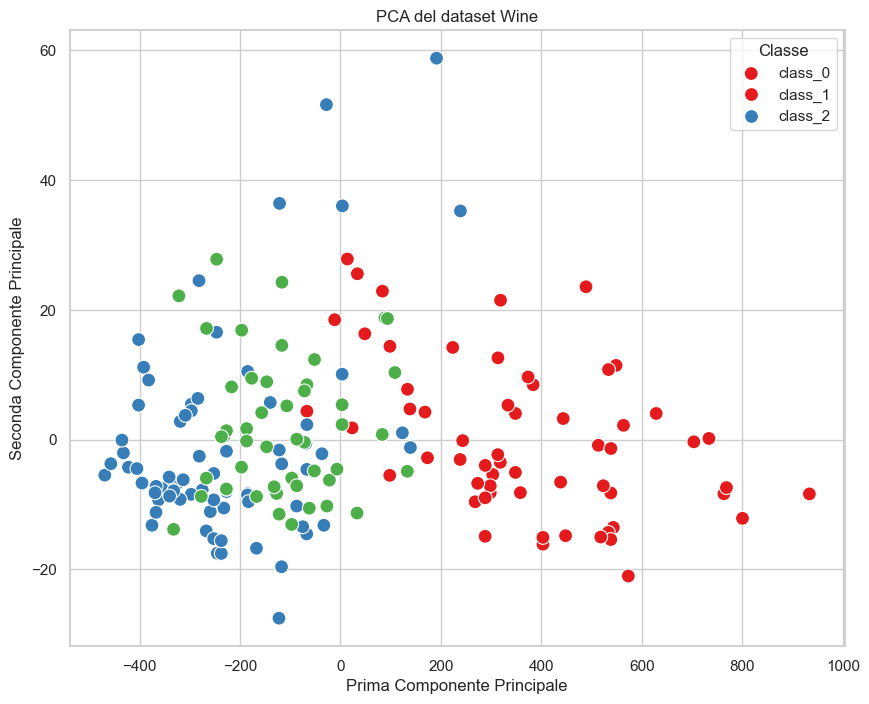

In [12]:
# Grafico scatter delle componenti principali
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set1', s=100)
plt.title('PCA del dataset Wine')
plt.xlabel('Prima Componente Principale')
plt.ylabel('Seconda Componente Principale')
plt.legend(title='Classe', labels=target_names)
plt.show()

In [13]:
# Dividi i dati in 80% training e 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Inizializza il modello RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predici le classi sul test set
y_pred = clf.predict(X_test)

In [16]:
# Calcola le metriche di performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' per problemi multiclasse
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nPerformance del modello Random Forest:")
print(f"Accuratezza: {accuracy:.2f}")
print(f"Precisione: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Performance del modello Random Forest:
Accuratezza: 1.00
Precisione: 1.00
Recall: 1.00
F1-score: 1.00


In [17]:
# Ottieni l'importanza delle feature dal modello
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Ordina in ordine decrescente

C:\Users\Rasty\AppData\Local\Temp\ipykernel_48380\532482045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[feature_names[i] for i in indices], y=importances[indices], palette='viridis')


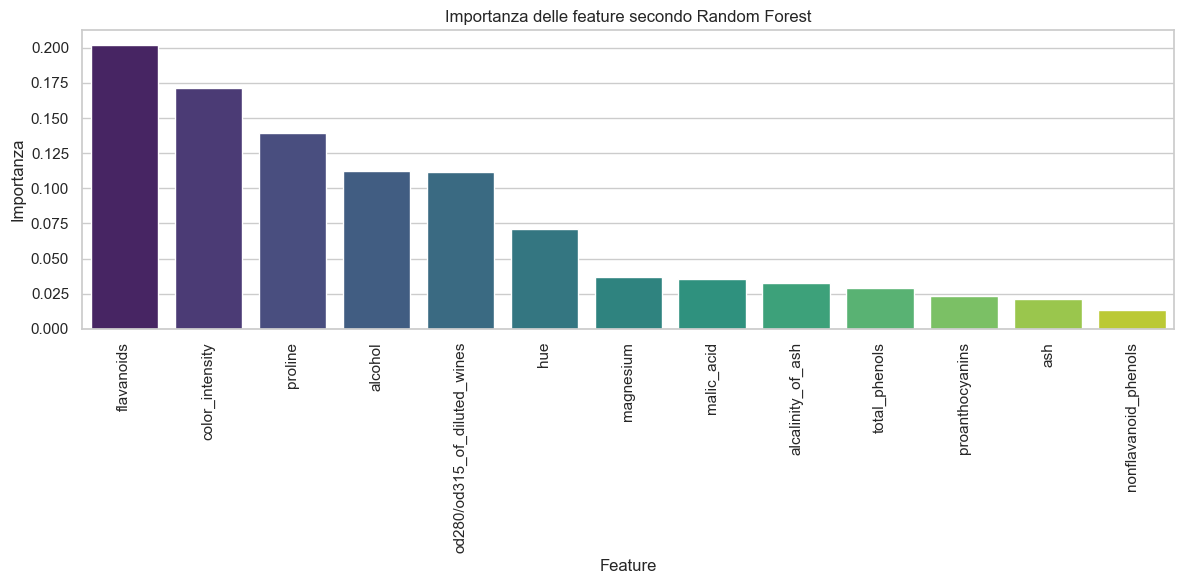

In [18]:
# Crea un grafico a barre delle feature più importanti
plt.figure(figsize=(12,6))
sns.barplot(x=[feature_names[i] for i in indices], y=importances[indices], palette='viridis')
plt.title('Importanza delle feature secondo Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importanza')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

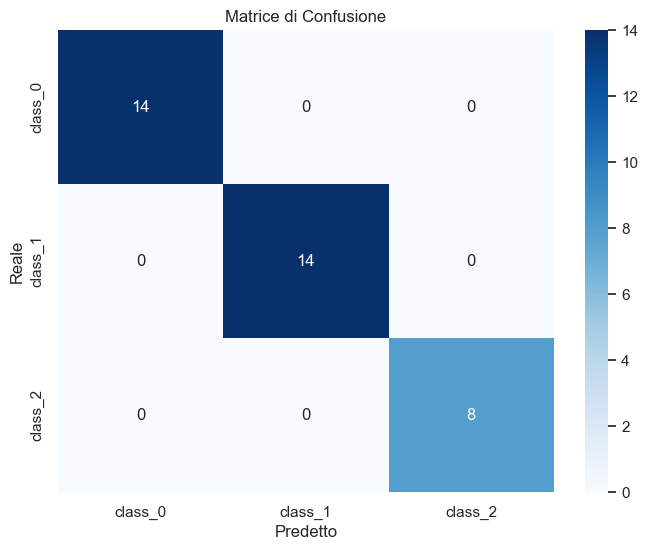

In [19]:
# Genera la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione con una heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Matrice di Confusione')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()

In [20]:
# Definisci la griglia di parametri da cercare per l'ottimizzazione
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inizializza GridSearchCV per ottimizzare il modello
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostra i migliori parametri trovati
print("\nMigliori parametri trovati:")
print(grid_search.best_params_)


Migliori parametri trovati:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [21]:
# Utilizza il miglior modello trovato
best_clf = grid_search.best_estimator_

# Predici sul test set con il modello ottimizzato
y_pred_optimized = best_clf.predict(X_test)

# Calcola le metriche di performance del modello ottimizzato
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized, average='weighted')
recall_opt = recall_score(y_test, y_pred_optimized, average='weighted')
f1_opt = f1_score(y_test, y_pred_optimized, average='weighted')

print("\nPerformance del modello Random Forest Ottimizzato:")
print(f"Accuratezza: {accuracy_opt:.2f}")
print(f"Precisione: {precision_opt:.2f}")
print(f"Recall: {recall_opt:.2f}")
print(f"F1-score: {f1_opt:.2f}")


Performance del modello Random Forest Ottimizzato:
Accuratezza: 1.00
Precisione: 1.00
Recall: 1.00
F1-score: 1.00


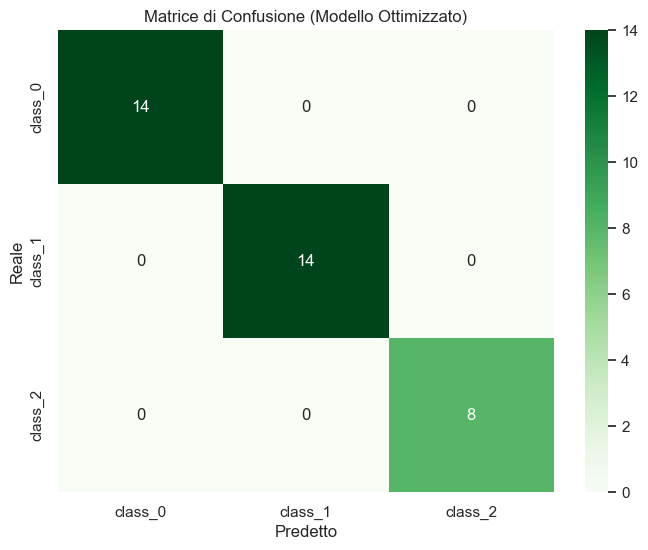

In [22]:
# Genera la matrice di confusione per il modello ottimizzato
cm_opt = confusion_matrix(y_test, y_pred_optimized)

# Visualizza la matrice di confusione del modello ottimizzato
plt.figure(figsize=(8,6))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Matrice di Confusione (Modello Ottimizzato)')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()